In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [45]:
state_job_fig = "CSV Files/Total Jobs per State"
total_ind_state = "CSV Files/Total Worker per Category"
state_ind_breakdown = "CSV Files/Manufacturing Jobs by Industry"
state_lab_force = "CSV Files/BLS Civilian Labor Force By State.csv"
combined_cancer = "Cancer Incidence & Death Rates/Resource/Added_final_combined_cancer_data.csv"

In [46]:
state_job_df = pd.read_csv(state_job_fig)
total_ind_df = pd.read_csv(total_ind_state)
st_in_brk_df = pd.read_csv(state_ind_breakdown)
state_lab_df = pd.read_csv(state_lab_force)
cancer_rate_df = pd.read_csv(combined_cancer)

In [59]:
job_lab_df = pd.merge(state_job_df,state_lab_df, on="State" )
job_lab_df.head()

,State,Workers per State,Civilia Labor Force,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Alabama,128315,"2,181,837",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,3239,"353,728",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,56602,"3,252,711",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,76421,"1,327,435",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,517711,"19,192,788",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
job_lab_df= job_lab_df.rename(columns={"Civilia Labor Force":"Labor Force"})

In [61]:
job_lab_df = job_lab_df.drop(columns=["Unnamed: 2","Unnamed: 3", "Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9"])

In [62]:
job_lab_df.head()

,State,Workers per State,Labor Force
0,Alabama,128315,"2,181,837"
1,Alaska,3239,"353,728"
2,Arizona,56602,"3,252,711"
3,Arkansas,76421,"1,327,435"
4,California,517711,"19,192,788"


In [4]:
state_job_ind = state_job_df.set_index("State")
state_job_ind.head()

,Workers per State
State,
Alabama,128315
Alaska,3239
Arizona,56602
Arkansas,76421
California,517711


<Figure size 432x288 with 0 Axes>

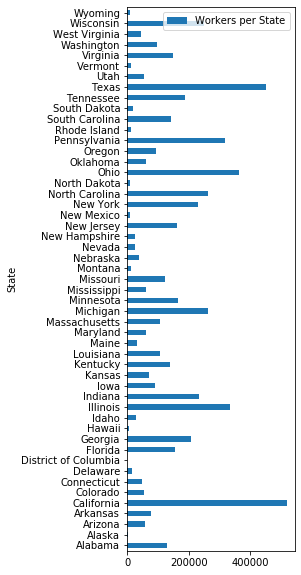

In [5]:
plt.figure()
state_job_ind.plot(kind = "barh",figsize=(3,10))

In [6]:
total_job_total_cancer = pd.merge(state_job_df,cancer_rate_df, on='State')

Text(0.5, 0, 'Total Manufacturing Employees')

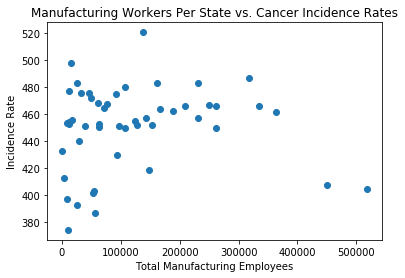

In [7]:
plt.figure()
plt.scatter(total_job_total_cancer["Workers per State"],total_job_total_cancer["Incidence Rate"])

plt.title("Manufacturing Workers Per State vs. Cancer Incidence Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Total Manufacturing Employees")

Text(0.5, 0, 'Total Manufacturing Employees')

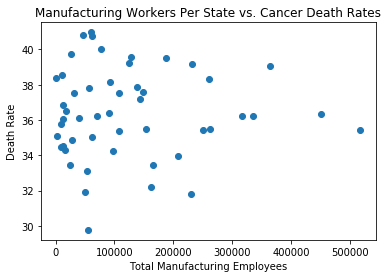

In [8]:
plt.figure()
plt.scatter(total_job_total_cancer["Workers per State"],total_job_total_cancer["Cancer Death_per_hundred_cancer_patient"])

plt.title("Manufacturing Workers Per State vs. Cancer Death Rates")
plt.ylabel("Death Rate")
plt.xlabel("Total Manufacturing Employees")

In [9]:
#Determining the pearson correlation between workes per state and cancer deaths per hunder cancer patients
x_axis= total_job_total_cancer["Workers per State"]
y_axis= total_job_total_cancer["Cancer Death_per_hundred_cancer_patient"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Death Rate is {round(correlation[0],2)}")


The pearson correlation between Workers per State and Cancer Death Rate is 0.01


In [10]:
#Determining the pearson correlation between workes per state and cancer incidence rates
x_axis= total_job_total_cancer["Workers per State"]
y_axis= total_job_total_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Indicence Rate is {round(correlation[0],2)}")



The pearson correlation between Workers per State and Cancer Indicence Rate is 0.06


In [11]:
#industries_states = st_in_brk_df.groupby(["State"])
st_in_brk_df.head()

,Job Category,People Employed,State,Year,NAICS Code
0,Basic chemical manufacturing,4474,New Jersey,2016,3251
1,Basic chemical manufacturing,7003,Ohio,2016,3251
2,Basic chemical manufacturing,4631,New York,2016,3251
3,Basic chemical manufacturing,820,New Mexico,2016,3251
4,Basic chemical manufacturing,2363,Missouri,2016,3251


In [33]:
#Creating a dataframe that lists job figures of petrolium and coal munafturing jobs per state

petro_coal_manu = st_in_brk_df.loc[st_in_brk_df["Job Category"]=="Petroleum and coal products manufacturing"]



In [36]:
pc_cancer = pd.merge(petro_coal_manu,cancer_rate_df, on="State" )
pc_cancer

,Job Category,People Employed,State,Year,NAICS Code,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Petroleum and coal products manufacturing,0,Idaho,2016,3241,440.5,7924.0,154.8,2761.0,34.843513
1,Petroleum and coal products manufacturing,0,Idaho,2016,324,440.5,7924.0,154.8,2761.0,34.843513
2,Petroleum and coal products manufacturing,1016,Missouri,2016,3241,455.2,32947.0,175.6,12920.0,39.214496
3,Petroleum and coal products manufacturing,1016,Missouri,2016,324,455.2,32947.0,175.6,12920.0,39.214496
4,Petroleum and coal products manufacturing,137,Maine,2016,3241,475.9,8700.0,174.1,3267.0,37.551724
...,...,...,...,...,...,...,...,...,...,...
93,Petroleum and coal products manufacturing,830,Maryland,2016,3241,450.5,30444.0,160.3,10674.0,35.061096
94,Petroleum and coal products manufacturing,2335,Minnesota,2016,324,463.8,28996.0,153.4,9691.0,33.421851
95,Petroleum and coal products manufacturing,2335,Minnesota,2016,3241,463.8,28996.0,153.4,9691.0,33.421851
96,Petroleum and coal products manufacturing,2794,New Jersey,2016,3241,483.3,50921.0,153.5,16407.0,32.220498


Text(0.5, 0, 'Total Petroleum & Coal Employees')

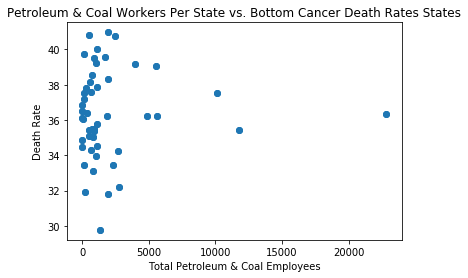

In [38]:
#figure of coal and petroleum workers compared in cancer rate deaths
plt.figure()
plt.scatter(pc_cancer["People Employed"],pc_cancer["Cancer Death_per_hundred_cancer_patient"])

plt.title("Petroleum & Coal Workers Per State vs. Bottom Cancer Death Rates States")
plt.ylabel("Death Rate")
plt.xlabel("Total Petroleum & Coal Employees")

In [40]:
x_axis= pc_cancer["People Employed"]
y_axis= pc_cancer["Cancer Death_per_hundred_cancer_patient"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Death Rate is {round(correlation[0],2)}")

The pearson correlation between Workers per State and Cancer Death Rate is 0.04


In [13]:
#Do comparisons with top 10 bottom 20 and industries. Done. That's below.
#See about comparing specific industries.

In [14]:
#Creating a dataframe that has the lowest deaths per 100 cancer patients.
dx = cancer_rate_df.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = True)
low_can_death = dx.head(10)
low_can_death

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
44,Utah,402.8,10143.0,127.0,3021.0,29.784088
5,New York,482.9,111527.0,151.0,35491.0,31.822787
11,Connecticut,472.4,20843.0,145.8,6657.0,31.938780
4,New Jersey,483.3,50921.0,153.5,16407.0,32.220498
45,Colorado,401.4,22701.0,138.9,7520.0,33.126294
19,Minnesota,463.8,28996.0,153.4,9691.0,33.421851
3,New Hampshire,483.5,8129.0,162.0,2718.0,33.435847
15,Georgia,466.4,49003.0,165.6,16650.0,33.977512
33,Washington,451.0,35813.0,157.1,12273.0,34.269679
1,Delaware,498.4,5803.0,169.6,1989.0,34.275375


In [15]:
bot_can_death = pd.merge(state_job_df,low_can_death, on ='State')
bot_can_death = bot_can_death.sort_values("Cancer Death_per_hundred_cancer_patient", ascending=True)
bot_can_death

,State,Workers per State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
8,Utah,54867,402.8,10143.0,127.0,3021.0,29.784088
7,New York,230548,482.9,111527.0,151.0,35491.0,31.822787
1,Connecticut,49562,472.4,20843.0,145.8,6657.0,31.938780
6,New Jersey,161424,483.3,50921.0,153.5,16407.0,32.220498
0,Colorado,53580,401.4,22701.0,138.9,7520.0,33.126294
4,Minnesota,166155,463.8,28996.0,153.4,9691.0,33.421851
5,New Hampshire,24944,483.5,8129.0,162.0,2718.0,33.435847
3,Georgia,208481,466.4,49003.0,165.6,16650.0,33.977512
9,Washington,97028,451.0,35813.0,157.1,12273.0,34.269679
2,Delaware,15705,498.4,5803.0,169.6,1989.0,34.275375


Text(0.5, 0, 'Total Manufacturing Employees')

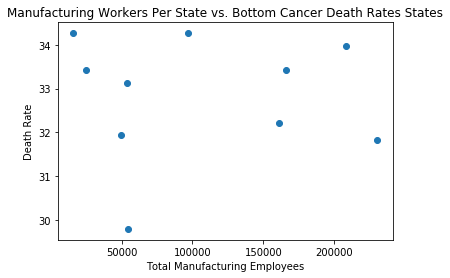

In [16]:
#Making a plot for the number of manufacturing workers verse cancer deaths.
plt.figure()
plt.scatter(bot_can_death["Workers per State"],bot_can_death["Cancer Death_per_hundred_cancer_patient"])

plt.title("Manufacturing Workers Per State vs. Bottom Cancer Death Rates States")
plt.ylabel("Death Rate")
plt.xlabel("Total Manufacturing Employees")

In [17]:
#Calculating the pearson correlation between workers pers state and cancer death rates in the bottom 10 states.

x_axis= bot_can_death["Workers per State"]
y_axis= bot_can_death["Cancer Death_per_hundred_cancer_patient"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Death Rate is {round(correlation[0],2)}")

The pearson correlation between Workers per State and Cancer Death Rate is -0.01


In [18]:
dx2 = dx.tail(20)

In [19]:
#Creating a dataframe that has the 20 states with the highest death per 100 patients
high_can_death = dx2.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = False)
high_can_death

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
12,Mississippi,468.6,15923.0,193.6,6522.0,40.959618
8,West Virginia,476.0,11653.0,189.4,4756.0,40.813524
28,Oklahoma,452.9,19837.0,183.7,8082.0,40.742048
13,Arkansas,467.8,16551.0,185.2,6623.0,40.015709
47,Nevada,392.6,12409.0,162.3,4934.0,39.761463
30,Alabama,451.9,26110.0,179.0,10332.0,39.571046
20,Tennessee,462.6,35692.0,184.0,14111.0,39.535470
25,Missouri,455.2,32947.0,175.6,12920.0,39.214496
23,Indiana,457.1,34242.0,178.4,13416.0,39.179954
21,Ohio,461.9,64858.0,177.1,25317.0,39.034506


In [20]:
state_job_df.head()

,State,Workers per State
0,Alabama,128315
1,Alaska,3239
2,Arizona,56602
3,Arkansas,76421
4,California,517711


In [21]:
#combinding the highest cancer death states with the total industry figures
top_can_ind = pd.merge(state_job_df, high_can_death, on= "State")
top_can_ind = top_can_ind.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = False)
top_can_ind

,State,Workers per State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
9,Mississippi,60455,468.6,15923.0,193.6,6522.0,40.959618
19,West Virginia,45957,476.0,11653.0,189.4,4756.0,40.813524
14,Oklahoma,62254,452.9,19837.0,183.7,8082.0,40.742048
2,Arkansas,76421,467.8,16551.0,185.2,6623.0,40.015709
11,Nevada,25744,392.6,12409.0,162.3,4934.0,39.761463
0,Alabama,128315,451.9,26110.0,179.0,10332.0,39.571046
17,Tennessee,188053,462.6,35692.0,184.0,14111.0,39.535470
10,Missouri,124148,455.2,32947.0,175.6,12920.0,39.214496
4,Indiana,231759,457.1,34242.0,178.4,13416.0,39.179954
13,Ohio,364242,461.9,64858.0,177.1,25317.0,39.034506


Text(0.5, 0, 'Total Manufacturing Employees')

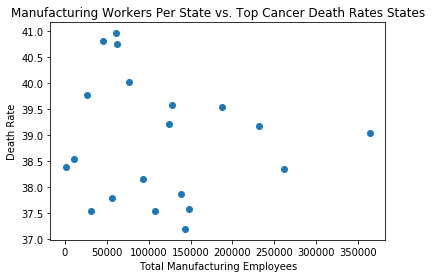

In [22]:
plt.figure()
plt.scatter(top_can_ind["Workers per State"],top_can_ind["Cancer Death_per_hundred_cancer_patient"])

plt.title("Manufacturing Workers Per State vs. Top Cancer Death Rates States")
plt.ylabel("Death Rate")
plt.xlabel("Total Manufacturing Employees")

In [23]:
#Calculating the pearson correlation between workers pers state and cancer death rates in the top 20 states.

x_axis= top_can_ind["Workers per State"]
y_axis= top_can_ind["Cancer Death_per_hundred_cancer_patient"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Death Rate is {round(correlation[0],2)}")

The pearson correlation between Workers per State and Cancer Death Rate is -0.11
